### Model Improvement

In [1]:
import pandas as pd

In [2]:
og = pd.read_pickle('data/sheet.pkl')

In [3]:
og['year'] = og['refresh_date'].dt.year

In [4]:
y = og[og['year'] == 2020].groupby('CONTACT_ID')[['sales_12M']].max()

In [5]:
len(y)

10010

In [6]:
df = pd.read_csv('aggregated_sample.csv')

In [7]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,year
0,0000286000028600002860000286000028600002860000...,33,0,0,0,21,0,0,0,21,...,0.0,0.0,0.0,191170.881,0.0,2.024851e+05,-5.488190e+06,0.0,0.00,24215
1,0000422000042200004220000422000042200004220000...,3,35,0,6,3,22,0,6,3,...,0.0,0.0,0.0,0.000,0.0,-4.907695e+06,0.000000e+00,0.0,0.00,24215
2,0000508000050800005080000508000050800005080000...,213,61,160,25,95,23,90,22,32,...,0.0,0.0,0.0,0.000,0.0,1.691483e+07,4.196567e+06,0.0,8104307.58,24215
3,0000604000060400006040000604000060400006040000...,14,18,10,18,14,12,10,12,14,...,0.0,0.0,0.0,0.000,0.0,1.859979e+07,0.000000e+00,0.0,0.00,24215
4,0000657000065700006570000657000065700006570000...,0,12,0,0,0,12,0,0,0,...,0.0,0.0,0.0,2328291.000,0.0,-3.452242e+05,0.000000e+00,0.0,0.00,24215


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CONTACT_ID                           10010 non-null  object 
 1   no_of_sales_12M_1                    10010 non-null  int64  
 2   no_of_Redemption_12M_1               10010 non-null  int64  
 3   no_of_sales_12M_10K                  10010 non-null  int64  
 4   no_of_Redemption_12M_10K             10010 non-null  int64  
 5   no_of_funds_sold_12M_1               10010 non-null  int64  
 6   no_of_funds_redeemed_12M_1           10010 non-null  int64  
 7   no_of_fund_sales_12M_10K             10010 non-null  int64  
 8   no_of_funds_Redemption_12M_10K       10010 non-null  int64  
 9   no_of_assetclass_sold_12M_1          10010 non-null  int64  
 10  no_of_assetclass_redeemed_12M_1      10010 non-null  int64  
 11  no_of_assetclass_sales_12M_1

In [9]:
X = df[['no_of_sales_12M_1', 'no_of_sales_12M_10K', 'sales_curr', 'sales_12M', 'AUM', 'redemption_rate']]

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree = DecisionTreeRegressor(max_depth = 4)

In [12]:
tree.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [13]:
from sklearn.tree import plot_tree

In [14]:
import matplotlib.pyplot as plt

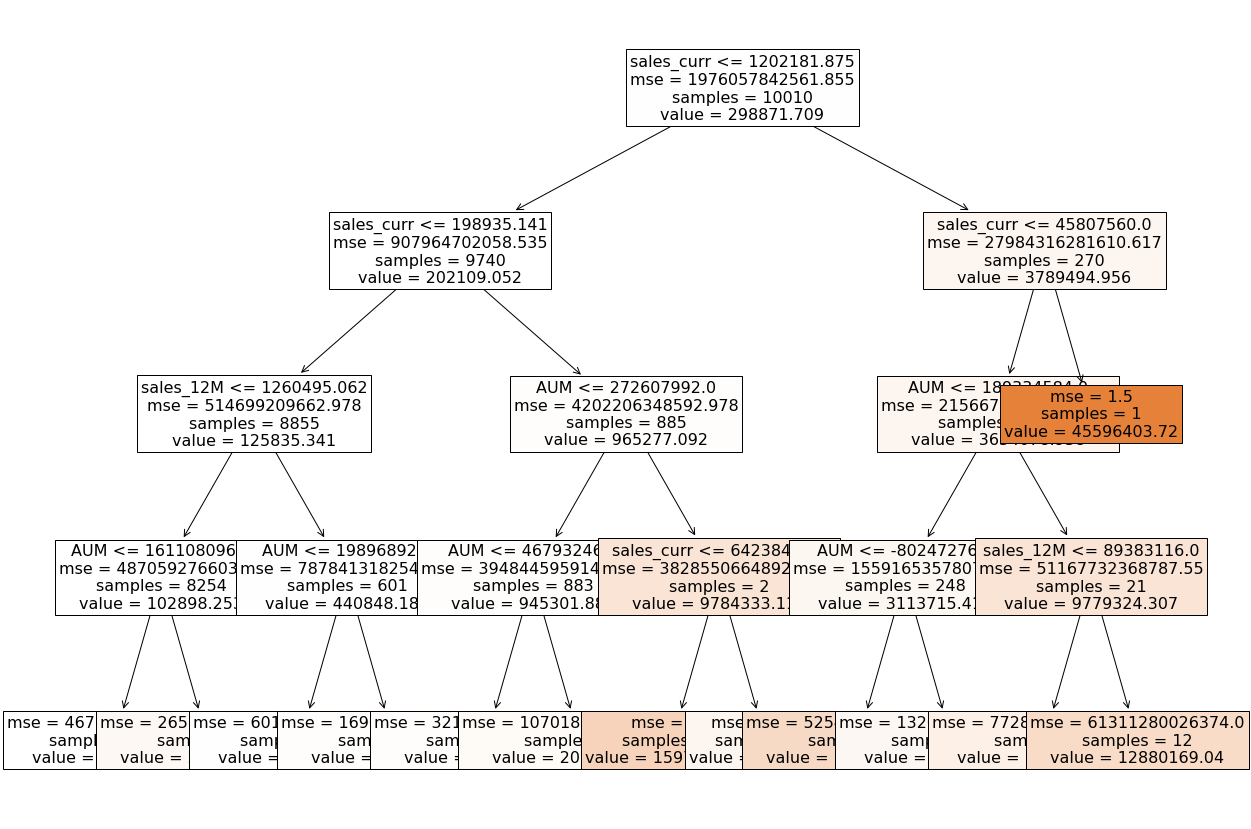

In [15]:
fig, ax = plt.subplots(figsize = (20, 15))
plot_tree(tree, ax = ax, fontsize = 16, filled = True, feature_names=X.columns);

- Group 1: Current Sales under 1202181 & over 198935
- Group 2: Current Sales under 1202181 & under 198935
- Group 3: Current Sales over 1202181 & under 45807560


In [16]:
df['y'] = y

In [17]:
y.index = df.index

In [18]:
df['y'] = y

In [19]:
g1 = df[(df['sales_curr'] < 90_000)]
g2 = df[(df['sales_curr'] > 90_000) & (df['sales_curr'] < 480_000)]
g3 = df[(df['sales_curr'] > 480_000)]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
def make_data(data):
    return data.drop(['CONTACT_ID', 'year', 'y'], axis = 1), data['y']

In [22]:
df.head(1)

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,year,y
0,0000286000028600002860000286000028600002860000...,33,0,0,0,21,0,0,0,21,...,0.0,0.0,191170.881,0.0,202485.058113,-5488190.28,0.0,0.0,24215,1328.530467


In [110]:
X, y = make_data(g1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))

print(lr.score(X_test, y_test))

0.03651804377768608
0.017153445694924274


In [109]:
X, y = make_data(g2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_train, y_train)

lr.score(X_test, y_test)

-1.011558988779722

In [108]:
X, y = make_data(g3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_train, y_train)

lr.score(X_test, y_test)

-6.7812942169892985

In [26]:
y_test

4226    2.172255e+06
4582    3.774347e+06
7710    0.000000e+00
4153    4.666818e+06
4894    6.923456e+06
            ...     
7412    3.520000e+05
6082    1.853910e+06
2172    1.060801e+06
3528    3.032640e+05
1249    1.719454e+06
Name: y, Length: 159, dtype: float64

In [28]:
len(y_train)

477

In [30]:
y_train.sum()/10

119193844.95053001

In [31]:
preds = lr.predict(X_train)

#### Lift

Purposefully overfit a regressor and build lift on train.

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [81]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mse'])

In [82]:
history = model.fit(X_train, y_train, epochs = 1000, verbose = 0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



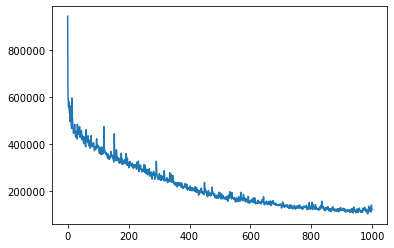

In [83]:
plt.plot(history.history['loss'])

In [111]:
preds = lr.predict(X_train).flatten()

In [117]:
lift_df = pd.DataFrame({'true': y_train, 'predicted': preds})

In [118]:
#lift_df['error'] = abs(y_train - preds)

In [119]:
lift_df = lift_df.sort_values(by = 'predicted')

In [120]:
lift_df['decile'] = pd.qcut(lift_df['predicted'], 10, duplicates = 'drop')

In [121]:
lift_df

,true,predicted,decile
1274,0.000000e+00,-4.010726e+05,"(-401072.556, 61289.876]"
4633,0.000000e+00,-3.408709e+05,"(-401072.556, 61289.876]"
1600,0.000000e+00,-2.978393e+05,"(-401072.556, 61289.876]"
1947,1.495078e+05,-2.742079e+05,"(-401072.556, 61289.876]"
3726,0.000000e+00,-2.585089e+05,"(-401072.556, 61289.876]"
...,...,...,...
9478,1.107156e+04,1.657355e+06,"(197981.508, 7631137.203]"
202,1.064375e+05,1.716561e+06,"(197981.508, 7631137.203]"
4061,0.000000e+00,2.817483e+06,"(197981.508, 7631137.203]"
3693,0.000000e+00,2.969969e+06,"(197981.508, 7631137.203]"


In [122]:
deciles = lift_df.groupby('decile')[['true']].sum()

In [123]:
deciles

,true
decile,
"(-401072.556, 61289.876]",4.325587e+07
"(61289.876, 69916.954]",3.883003e+07
"(69916.954, 78751.621]",2.916295e+07
"(78751.621, 82661.731]",2.791377e+07
"(82661.731, 84544.217]",2.054860e+07
"(84544.217, 84688.963]",1.412183e+08
"(84688.963, 98058.826]",4.565858e+07
"(98058.826, 126957.591]",8.663218e+07
"(126957.591, 197981.508]",7.226468e+07


In [124]:
deciles['baseline'] = y_train.sum()/10

In [129]:
deciles = deciles.sort_values(by = 'true', ascending = False)

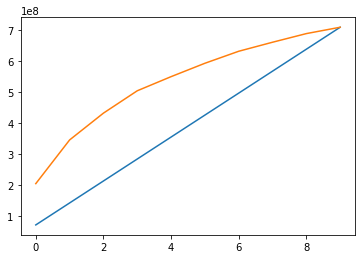

In [130]:
plt.plot(range(10), deciles['baseline'].cumsum())
plt.plot(range(10), deciles['true'].cumsum())

In [54]:
lift = deciles.cumsum()

In [55]:
lift

,true,baseline
decile,,
"(1133.523, 283592.253]",8.381095e+07,1.191938e+08
"(283592.253, 501033.872]",1.541340e+08,2.383877e+08
"(501033.872, 699369.681]",2.259204e+08,3.575815e+08
"(699369.681, 932890.514]",2.993906e+08,4.767754e+08
"(932890.514, 1153550.566]",3.740189e+08,5.959692e+08
"(1153550.566, 1422863.616]",4.387457e+08,7.151631e+08
"(1422863.616, 1821665.428]",5.263695e+08,8.343569e+08
"(1821665.428, 2417730.168]",5.870301e+08,9.535508e+08
"(2417730.168, 3245884.551]",7.210413e+08,1.072745e+09


In [32]:
y

,sales_12M
CONTACT_ID,
0000286,1.328530e+03
0000422,1.448115e+04
0000508,2.691157e+06
0000604,7.870248e+04
0000657,0.000000e+00
...,...
85202171285268924631,1.931900e+04
85202171385039349401,1.007342e+05
85202171385367383048,2.510630e+03
